In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

In [ ]:
data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.shape

In [ ]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age' ]]
y = data[['Outcome']]

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)             
X_train_pca = pca.fit_transform(X_train_norm)
X_train_pca =pca.transform(X_train_norm)
X_test_pca = pca.fit_transform(X_test_norm)
X_test_pca =pca.transform(X_test_norm)
pca.explained_variance_ratio_

array([0.28981344, 0.22569183])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay

0.7083333333333334
              precision    recall  f1-score   support

    Diabetes       0.74      0.85      0.79       123
not Diabetes       0.63      0.46      0.53        69

    accuracy                           0.71       192
   macro avg       0.68      0.65      0.66       192
weighted avg       0.70      0.71      0.70       192



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


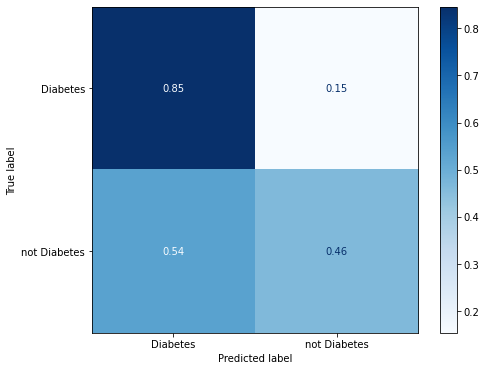

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train , y_train)

prediction =knn.predict(X_test) 

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

target_names = ['Diabetes','not Diabetes']
print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))   

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

0.7395833333333334
              precision    recall  f1-score   support

    Diabetes       0.76      0.88      0.81       123
not Diabetes       0.69      0.49      0.58        69

    accuracy                           0.74       192
   macro avg       0.72      0.69      0.69       192
weighted avg       0.73      0.74      0.73       192



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


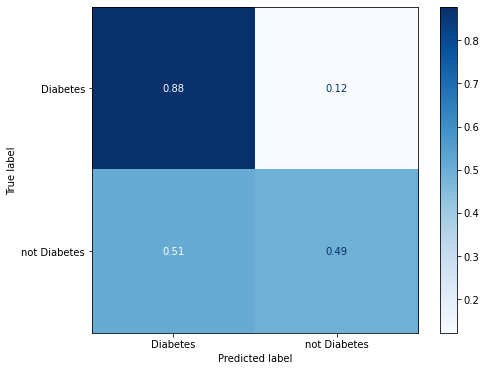

In [ ]:
#knn using standerd scaler
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_norm , y_train)

prediction =knn.predict(X_test_norm) 

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

target_names = ['Diabetes','not Diabetes']
print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))   

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics

predictions = dt.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7552083333333334


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[98 25]
 [22 47]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       123
           1       0.65      0.68      0.67        69

    accuracy                           0.76       192
   macro avg       0.73      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192



In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(n_estimators=200)

In [ ]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.78125


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[105  18]
 [ 24  45]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       123
           1       0.71      0.65      0.68        69

    accuracy                           0.78       192
   macro avg       0.76      0.75      0.76       192
weighted avg       0.78      0.78      0.78       192



In [ ]:
#svm
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
svc_pred = svc_model.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7708333333333334


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[112  11]
 [ 33  36]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       123
           1       0.77      0.52      0.62        69

    accuracy                           0.77       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



In [ ]:
https://www.analyticsvidhya.com/blog/2022/01/diabetes-prediction-using-machine-learning/

In [ ]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_p = model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics
print("accuracy:" ,metrics.accuracy_score(y_test,y_p))

accuracy: 0.7916666666666666


In [ ]:
test_p = model.predict(X_test)
print(metrics.classification_report(y_test, test_p))
print(metrics.confusion_matrix(y_test,test_p))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       123
           1       0.70      0.72      0.71        69

    accuracy                           0.79       192
   macro avg       0.77      0.78      0.78       192
weighted avg       0.79      0.79      0.79       192

[[102  21]
 [ 19  50]]
